# Pymaceuticals Inc.
---

### Analysis

1. The Drug Regimens Ketapril, Naftisol, and Stelasyn have a higher avg tumor volume than the Placebo. Since there is a correlation between weight and tumor volume an analysis could be done to see if these drugs actually could be making tumor volume go up. 
   
2. After 20 days on the drug regimen Capomulin  the tumor volume began to go down for mouse l509. 

3. For the Drug Regimen Capomulin as weight increase so does tumor volume. (correlation coefficient 0.84)



 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import statistics
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mydataframe_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mydataframe_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

mousecount = len(mydataframe_df["Mouse ID"].unique())
mousecount


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mydataframe_df["Mouse_Time"] = mydataframe_df["Mouse ID"].map(str) + "" + mydataframe_df["Timepoint"].map(str)
mousetime_df = (mydataframe_df[mydataframe_df.duplicated(subset=['Mouse_Time'],keep=False)])
print(mousetime_df["Mouse ID"].unique())




['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

Filter_df = mydataframe_df[mydataframe_df['Mouse ID'] == 'g989'] 
Filter_df  


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse_Time
908,g989,Propriva,Female,21,26,0,45.000000,0,g9890
909,g989,Propriva,Female,21,26,0,45.000000,0,g9890
910,g989,Propriva,Female,21,26,5,48.786801,0,g9895
911,g989,Propriva,Female,21,26,5,47.570392,0,g9895
912,g989,Propriva,Female,21,26,10,51.745156,0,g98910
913,g989,Propriva,Female,21,26,10,49.880528,0,g98910
914,g989,Propriva,Female,21,26,15,51.325852,1,g98915
915,g989,Propriva,Female,21,26,15,53.442020,0,g98915
916,g989,Propriva,Female,21,26,20,55.326122,1,g98920
917,g989,Propriva,Female,21,26,20,54.657650,1,g98920


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = mydataframe_df[(mydataframe_df['Mouse ID'] != 'g989')]
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse_Time
0,k403,Ramicane,Male,21,16,0,45.000000,0,k4030
1,k403,Ramicane,Male,21,16,5,38.825898,0,k4035
2,k403,Ramicane,Male,21,16,10,35.014271,1,k40310
3,k403,Ramicane,Male,21,16,15,34.223992,1,k40315
4,k403,Ramicane,Male,21,16,20,32.997729,1,k40320


In [7]:
# Checking the number of mice in the clean DataFrame.
mousecount_clean = len(clean_df["Mouse ID"].unique())
mousecount_clean

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_df = clean_df[["Drug Regimen","Tumor Volume (mm3)"]]
summary_df = summary_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume"})
summary_df.head()

Mean_df = summary_df.groupby(["Drug Regimen"]).mean('Tumor Volume')
Mean_df = Mean_df.rename(columns={"Tumor Volume": "Mean Tumor Volume"})

Median_df = summary_df.groupby(["Drug Regimen"]).median('Tumor Volume')
Median_df = Median_df.rename(columns={"Tumor Volume": "Median Tumor Volume"})

#Re-naming Tumor Volume in (summary_vardf) before getting variance in next dataframe(var_df)
summary_vardf = clean_df[["Drug Regimen","Tumor Volume (mm3)"]]
summary_vardf = summary_vardf.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
Var_df = summary_vardf.groupby(["Drug Regimen"]).var()["Tumor Volume Variance"]

#standard DEV
summary_stddf = clean_df[["Drug Regimen","Tumor Volume (mm3)"]]
summary_stddf = summary_stddf.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
std_df = summary_stddf.groupby(["Drug Regimen"]).std()["Tumor Volume Std. Dev."]

#std Error
summary_errdf = clean_df[["Drug Regimen","Tumor Volume (mm3)"]]
summary_errdf = summary_errdf.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})
std_error_df = summary_errdf.groupby(["Drug Regimen"]).sem()["Tumor Volume Std. Err."]


# Assemble the resulting series into a single summary DataFrame.
mysummary = pd.concat([Mean_df, Median_df,Var_df,std_df,std_error_df], axis=1, join='inner')
display(mysummary)




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

my_df=mydataframe_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(["mean","median","var", "std", "sem"])
display(my_df)








,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

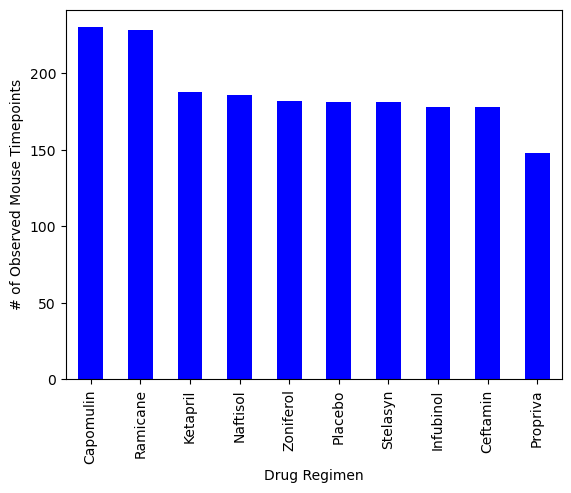

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Mouse = clean_df["Drug Regimen"].value_counts()
Mychart = Mouse.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()





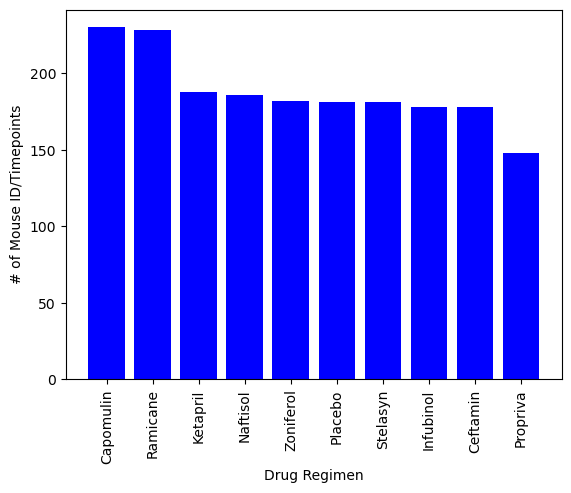

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = Mouse.index.values
y= Mouse.values
plt.bar(x, y, color='b', align='center')

#labels for x and y axis
#Rotate labels for a axis 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mouse ID/Timepoints")
plt.xticks(rotation="vertical")
plt.show()







<Axes: ylabel='Sex'>

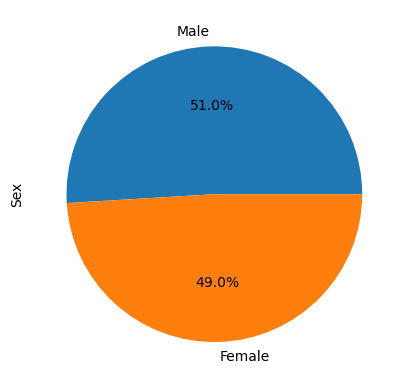

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_df = clean_df["Sex"].value_counts()
male_female_df.plot.pie(autopct='%1.1f%%')





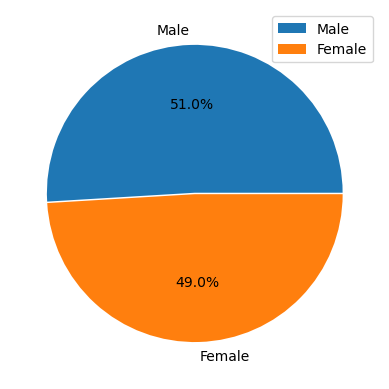

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

group_names = ['Male','Female']
explode = (0.01, 0)
male_female_df = clean_df["Sex"].value_counts()

plt.pie(male_female_df, autopct="%1.1f%%", labels=group_names, explode = explode)
plt.legend(labels=group_names,loc="best")
plt.show()





## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

maxtime_df = clean_df.groupby(["Mouse ID"]).max('Timepoint')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.merge(clean_df, maxtime_df, on=('Mouse ID','Timepoint'),how = "inner")
new_df



,Mouse ID,Drug Regimen,Sex,Age_months_x,Weight (g)_x,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Mouse_Time,Age_months_y,Weight (g)_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,k40345,21,16,45.000000,1
1,s185,Capomulin,Female,3,17,45,23.343598,1,s18545,3,17,45.000000,1
2,x401,Capomulin,Female,16,15,45,28.484033,0,x40145,16,15,45.473753,0
3,m601,Capomulin,Male,22,17,45,28.430964,1,m60145,22,17,45.000000,1
4,g791,Ramicane,Male,11,16,45,29.128472,1,g79145,11,16,45.851531,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0,z3145,21,28,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0,z43510,12,26,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3,z58145,24,25,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3,z79545,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
treatment_list = []
counter = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes   
        
for i in treatment: 
    
    #searchs for data equal to treatment list data
    treatment_search = new_df.loc[new_df['Drug Regimen'] == i] 
    
    #gets tumor volume from the new_df, The inner join on mouse ID and timepoint gave us only max ID rows from the max_time_DF
    tumor_df = treatment_search["Tumor Volume (mm3)_x"]      
    
    
#appending to treatment list for plotting       
    treatment_list.append(tumor_df)    
    quartiles = tumor_df.quantile([.25, .5, .75])    
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = (upperq-lowerq)
    
# Determine outliers using upper and lower bounds
    Lower_bounds = (lowerq - (1.5*iqr))
    Upper_bounds = (upperq + (1.5*iqr))    
        
#Printing IQR     
    if counter == 0:
        print(f" ")
    print(f"(IQR): {i} ------- {iqr}")
    print(f"(Lower quartile) : {i} ------- {lowerq}")
    print(f"(Upper quartile) : {i} ------- {upperq}")
    print(f"(Lower Bound) : {i} ------- {Lower_bounds}")  
    print(f"(Upper Bound) : {i} ------- {Upper_bounds}")  
    print(f" ")
    counter += 1           
    
    

   
    

 
(IQR): Capomulin ------- 7.781863460000004
(Lower quartile) : Capomulin ------- 32.37735684
(Upper quartile) : Capomulin ------- 40.1592203
(Lower Bound) : Capomulin ------- 20.70456164999999
(Upper Bound) : Capomulin ------- 51.83201549
 
(IQR): Ramicane ------- 9.098536719999998
(Lower quartile) : Ramicane ------- 31.56046955
(Upper quartile) : Ramicane ------- 40.65900627
(Lower Bound) : Ramicane ------- 17.912664470000003
(Upper Bound) : Ramicane ------- 54.30681135
 
(IQR): Infubinol ------- 11.477135160000003
(Lower quartile) : Infubinol ------- 54.04860769
(Upper quartile) : Infubinol ------- 65.52574285
(Lower Bound) : Infubinol ------- 36.83290494999999
(Upper Bound) : Infubinol ------- 82.74144559000001
 
(IQR): Ceftamin ------- 15.577752179999997
(Lower quartile) : Ceftamin ------- 48.72207785
(Upper quartile) : Ceftamin ------- 64.29983003
(Lower Bound) : Ceftamin ------- 25.355449580000002
(Upper Bound) : Ceftamin ------- 87.66645829999999
 


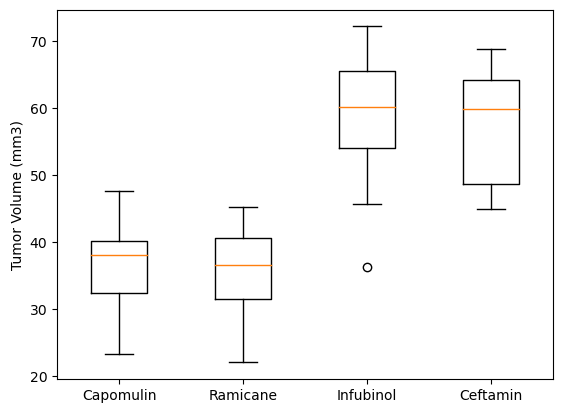

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


plt.boxplot(treatment_list)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

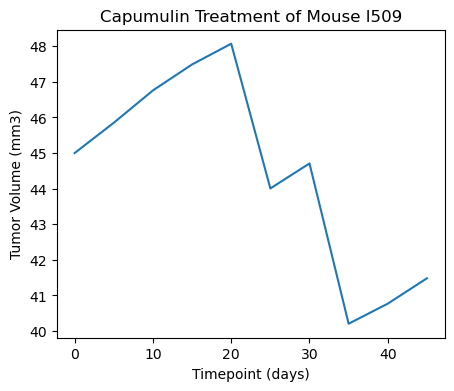

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
MouseID_DF = clean_df.loc[clean_df['Mouse ID'] == "l509"]
Capomulin_DF_1 = MouseID_DF.loc[MouseID_DF['Drug Regimen'] == "Capomulin"]


Capomulin_DF_1.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", grid=False, figsize=(5,4), legend=False)   
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capumulin Treatment of Mouse l509")

plt.show()




C:\Users\jmced\AppData\Local\Temp\ipykernel_12340\207976840.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_vol =Capomulin_DF.groupby(['Mouse ID']).mean()


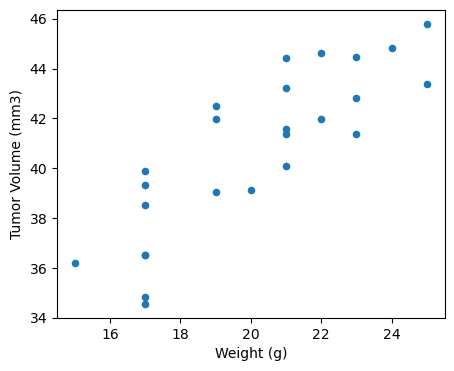

In [15]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_DF = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
avg_vol =Capomulin_DF.groupby(['Mouse ID']).mean()
avg_vol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=False, figsize=(5,4))          
plt.show()



## Correlation and Regression

The correlation coefficient between weight and avg tumor vol is 0.84


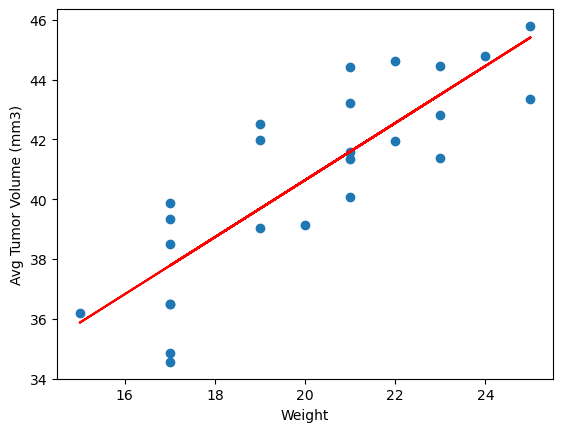

In [66]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = avg_vol['Weight (g)']
avgtumorvol = avg_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avgtumorvol)
regress_values = weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,avgtumorvol)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The correlation coefficient between weight and avg tumor vol is {round(st.pearsonr(weight,avgtumorvol)[0],2)}")
plt.xlabel("Weight")
plt.ylabel("Avg Tumor Volume (mm3)")

plt.show()


